# Obtención de Insights 
---
## Consigna

Generar insights que permitan dar respuesta a las preguntas por responder

---



## API a utilizar: RAWG

RAWG es la base de datos más grande de videojuegos que existe en la actualidad, además de ser un servicio de descubrimiento y recomendaciones de videojuegos. Comparten más de 500.000 datos sobre videojuegos, además de proveer recomendaciones basadas en machine learning.

Esta API puede servir de mucho para el proyecto de data science que se viene desarrollando en entregas anteriores, incluso podría servir para reemplazar la base de datos actual y enriquecerla con nueva data.

A continuación, se presenta una exploración de dicha API y la obtención de la data respectiva para luego detectar outliers y realizar un análisis univariado.

In [ ]:
# Llibrerías a utilizar
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.core.dtypes.cast import date

In [ ]:
# Clave de API de Rawg
api_key = "00565200b6154b65b4751d6ee239866d"

# Número máximo de juegos a obtener
max_games = 10000

# Lista vacía para almacenar los datos de los juegos
game_data = []

# Inicializar la variable page en 1
page = 1

# Ciclo para obtener los datos de los juegos
while len(game_data) < max_games:
    
    # URL de la API de Rawg para obtener los juegos de la página actual
    url = f"https://api.rawg.io/api/games?key={api_key}&page={page}"
    
    # Solicitud GET a la API de Rawg
    response = requests.get(url)
    
    # Convertir la respuesta JSON en un diccionario de Python
    data = response.json()   
    # Obtener los datos de cada juego de la página actual y añadirlos a la lista
    for result in data["results"]:
        game_data.append({
            "Nombre": result.get("name", ""),
            "Fecha_Lanzamiento": result.get("released", ""),
            "Plataformas": ", ".join([platform["platform"]["name"] for platform in result.get("platforms", [])]),
            "Generos": ", ".join([genre["name"] for genre in result.get("genres", [])]),
            "Desarrolladores": ", ".join([developer["name"] for developer in result.get("developers", [])]),
            "Editores": ", ".join([publisher["name"] for publisher in result.get("publishers", [])]),
            "Puntuacion": result.get("rating", ""),
            "Puntuacion_Top": result.get("rating_top", ""),
            "Descripcion": result.get("description", ""),
            "URL_Imagen": result.get("background_image", ""),
            "Sitio_Web": result.get("website", ""),
            "Metacritic": result.get("metacritic", ""),
            "Rating_ESRB": result.get("esrb_rating")["name"] if result.get("esrb_rating") is not None else "",
            "Rating_PEGI": result.get("pegi_rating", {}).get("name", ""),
            "Tags": ", ".join([tag["name"] for tag in result.get("tags", [])]),
            "Comentarios": result.get("comments_count", ""),
            "Reviews": result.get("reviews_count", ""),
            "Playtime": result.get("playtime", ""),
            "Playtime_Completionist": result.get("playtime_completionist", ""),
            "Median_Playtime": result.get("playtime_median", "")
        })
    
    # Incrementar la variable page en 1 para obtener la siguiente página
    page += 1
    
# Crear dataframe
df = pd.DataFrame(game_data)

# Mostrar el dataframe
df

,Nombre,Fecha_Lanzamiento,Plataformas,Generos,Desarrolladores,Editores,Puntuacion,Puntuacion_Top,Descripcion,URL_Imagen,Sitio_Web,Metacritic,Rating_ESRB,Rating_PEGI,Tags,Comentarios,Reviews,Playtime,Playtime_Completionist,Median_Playtime
0,Grand Theft Auto V,2013-09-17,"PlayStation 5, Xbox Series S/X, PlayStation 4,...","Action, Adventure",,,4.47,5,,https://media.rawg.io/media/games/456/456dea5e...,,92.0,Mature,,"Singleplayer, Steam Achievements, Multiplayer,...",,6377,73,,
1,The Witcher 3: Wild Hunt,2015-05-18,"Xbox Series S/X, PlayStation 4, Nintendo Switc...","Action, Adventure, RPG",,,4.66,5,,https://media.rawg.io/media/games/618/618c2031...,,92.0,Mature,,"Singleplayer, Full controller support, Atmosph...",,6071,46,,
2,Portal 2,2011-04-18,"Xbox 360, Linux, macOS, PlayStation 3, PC, Xbo...","Shooter, Puzzle",,,4.62,5,,https://media.rawg.io/media/games/328/3283617c...,,95.0,Everyone 10+,,"Singleplayer, Steam Achievements, Multiplayer,...",,5267,11,,
3,Tomb Raider (2013),2013-03-05,"PlayStation 4, macOS, PC, Xbox One, Xbox 360, ...","Action, Adventure",,,4.05,4,,https://media.rawg.io/media/games/021/021c4e21...,,86.0,Mature,,"Singleplayer, Multiplayer, Full controller sup...",,3661,10,,
4,Counter-Strike: Global Offensive,2012-08-21,"PC, Xbox 360, PlayStation 3","Action, Shooter",,,3.56,4,,https://media.rawg.io/media/games/736/73619bd3...,,81.0,Mature,,"Steam Achievements, Multiplayer, Full controll...",,3243,65,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NBA Jam,2010-10-05,"Xbox 360, PlayStation 3, Wii",Sports,,,3.77,4,,https://media.rawg.io/media/screenshots/044/04...,,NaN,Everyone,,"Multiplayer, Controller, console, future, fire...",,26,0,,
9996,Ironbound,2017-05-31,"macOS, iOS, Android, PC","RPG, Strategy, Card, Indie",,,0.00,0,,https://media.rawg.io/media/screenshots/6e3/6e...,,NaN,Teen,,"Singleplayer, Multiplayer, steam-trading-cards...",,3,1,,
9997,Stormworks: Build and Rescue,2018-02-28,"Nintendo Switch, PC","Simulation, Casual",,,4.00,5,,https://media.rawg.io/media/screenshots/2db/2d...,,NaN,Everyone,,"Singleplayer, Steam Cloud, cooperative, Steam ...",,22,5,,
9998,Project Freedom,2009-10-14,PC,"Action, Simulation",,,0.00,0,,https://media.rawg.io/media/screenshots/c5c/c5...,,NaN,,,"Singleplayer, Sci-fi, Space",,4,1,,


## Detección de Outliers

<Axes: >

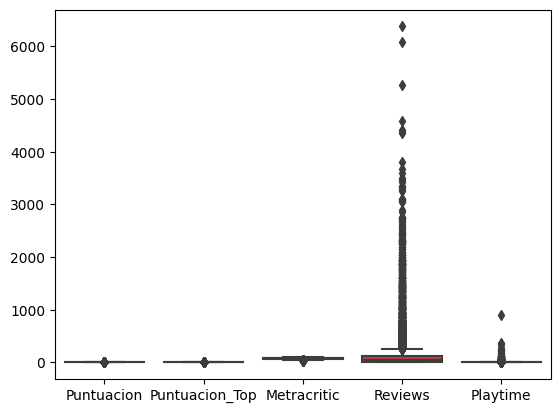

In [ ]:
# Detección de outliers en variables numéricas
sns.boxplot(data=df)

### Interpretación

Se puede apreciar que las variables Puntuación, Puntuación_Top y Metacritic se concentran alrededor de la media. Mientras que Reviews tiene valores muy alejados, por sobre 6000. Playtime presenta un caso similar, pero no tan acentuado, donde se puede apreciar que existe un valor cercano a 1000. En primera instancia, no sería tan relevante sacar outliers o reemplazar sus valores, ya que representan la realidad de lo que explican. Distinto sería si la variable Metacritic tuviese outliers, porque son valores predefinidos, por lo tanto, un valor muy alejado claramente podría significar, por ejemplo, un error de tipificación.

## Análisis Univariado

In [ ]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Descripción estadística del DataFrame
print("Resumen Estadístico\n-------------------")
print(df_numeric.describe())
print("-------------------\n")

# Media
print("Media\n-------------------")
print(df_numeric.mean())
print("-------------------\n")

# Mediana
print("Mediana\n-------------------")
print(df_numeric.median())
print("-------------------\n")

# Moda
print("Moda\n-------------------")
print(df_numeric.mode())
print("-------------------\n")

# Varianza
print("Varianza\n-------------------")
print(df_numeric.var())
print("-------------------\n")

# Desviación estándar
print("Desviación Estandar\n-------------------")
print(df_numeric.std())
print("-------------------\n")

Resumen Estadístico
-------------------
         Puntuacion  Puntuacion_Top  Metracritic       Reviews      Playtime
count  10000.000000    10000.000000  4394.000000  10000.000000  10000.000000
mean       2.975221        3.140400    74.737142    141.055500      3.818500
std        1.121559        1.429088    10.540065    341.774564     13.419924
min        0.000000        0.000000    23.000000      0.000000      0.000000
25%        2.480000        3.000000    69.000000     14.000000      1.000000
50%        3.220000        4.000000    76.000000     37.000000      2.000000
75%        3.780000        4.000000    82.000000    111.000000      4.000000
max        4.880000        5.000000    99.000000   6377.000000    900.000000
-------------------

Media
-------------------
Puntuacion          2.975221
Puntuacion_Top      3.140400
Metracritic        74.737142
Reviews           141.055500
Playtime            3.818500
dtype: float64
-------------------

Mediana
-------------------
Puntuacion 

### Interpretación
#### Resumen estadístico
Uno de los resúmenes de las variables que más llama la atención es el de la cuenta de datos de Metacritic. En total son 4388, dejando 5612 filas sin puntuación de Metacritic. Para un tratamiento de datos es necesario evaluar qué metodología es la mejor para tratar los NaN. En este caso, no sería tan descabellado considerar el reemplazo de esos valores usando la media, ya que la desviación estándar es de 10.53 y si contrastamos la media con la mediana, podemos apreciar que no están tan alejadas, lo cual, valida nuestra decisión.


## Análisis Bivariado

### Playtime vs Metacritic

<Axes: xlabel='Playtime', ylabel='Metacritic'>

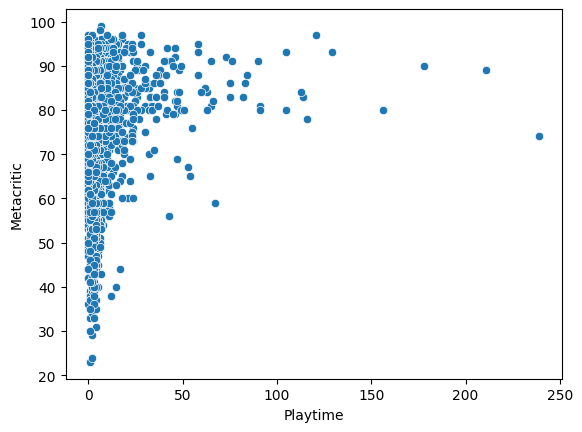

In [ ]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Playtime y Metacritic
sns.scatterplot(x="Playtime", y="Metacritic", data=df_numeric)

### Interpretación

Se puede apreciar un pequeño aumento de en la puntuación de Metacritic a medida que Playtime aumenta, pero se acumulan en valores de Playtime bajos. Algo que se puede asegurar es que los valores de Playtime más altos, no van a mostrar valores de Metacritic bajos. Esto obedece un sentido lógico, donde el desarrollar videojuegos más largosen duración requiere mayor dedicación en su desarrollo y en su testeo como tal previo al lanzamiento, por lo tanto, un producto de mejor calidad para los ojos de la crítica especializada.

### Playtime vs Reviews

<Axes: xlabel='Playtime', ylabel='Reviews'>

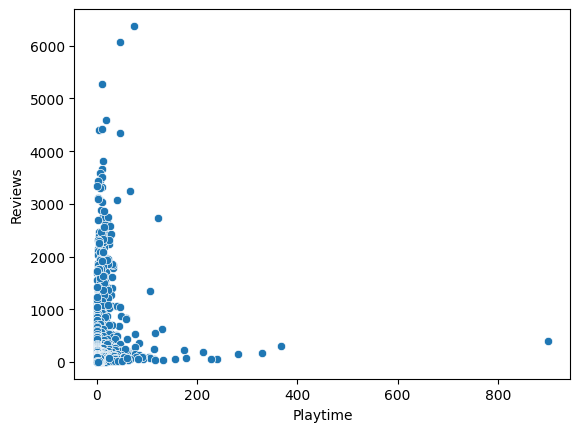

In [ ]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Visualización de Playtime y Reviews
sns.scatterplot(x="Playtime", y="Reviews", data=df_numeric)

### Interpretación

Podemos ver que a medida que el valor de Playtime aumenta, son menos las Reviews que recibe el videojuego. Para valores de tiempo de juego entre 0 y 50 es donde se acumula la mayor cantidad de reviews. El insight que nos permite obtener es que el público general se inclina hacia videojuegos de mediana duración y esos les dedica un tiempo para dejar una reseña.

## Análisis Multivariado

<Axes: >

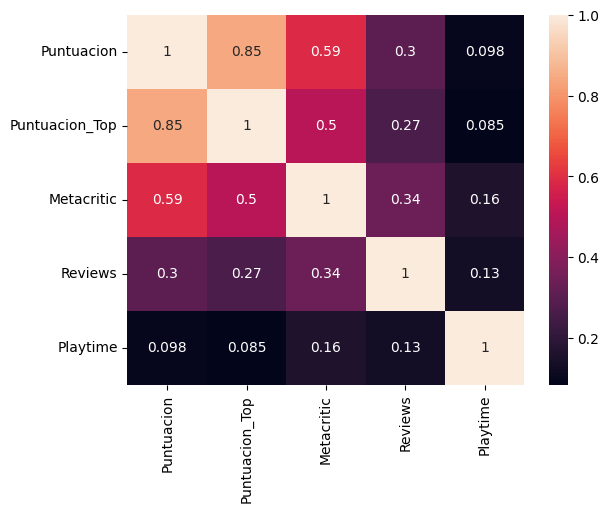

In [ ]:
#Selección de Variables Numéricas solamente para evaluar
df_numeric = df.select_dtypes(include=['int', 'float'])

# Matriz de Correlación
matriz_correlacion = df_numeric.corr()
sns.heatmap(matriz_correlacion, annot=True)

### Interpretación

Dentro de las variables observadas en la matriz de correlación, podemos apreciar que Playtime tiene una correlación muy baja con el resto de las variables, lo cual obedece un poco al hecho de que esta es una variable propia del videojuego, es decir, una característica. Mientras tanto, el resto de las variables, están sujetas a opiniones, en otras palabras, son subjetivas y describren al producto desde el punto de vista del consumidor. Por esa razón, tiene cierta lógica que se presenten correlaciones tan bajas.

Se destaca la correlación de 0,59 existente entre Metacritic y Puntuacion. Esto sugiere que hay cierto consenso general entre la crítica especializada y la opinión del público en general. Sin embargo, podría darse el caso de que esta correlación pueda ser aún mayor si es que se analiza a fondo la presencia de outliers en ambas variables y se realiza el tratamiento adecuado. 

## Data Wrangling

In [ ]:
# Data Wrangling

# Contamos valores nulos en cada columna
print(df.isna().sum())

# Eliminamos duplicados en caso de que existan
df = df.drop_duplicates()

# Cambio de tipos de variable Fecha_Lanzamiento
df["Fecha_Lanzamiento"] = pd.to_datetime(df["Fecha_Lanzamiento"], errors='coerce').dt.date

# Eliminamos las filas con valores nulos en Fecha_Lanzamiento
df = df.dropna(subset=['Fecha_Lanzamiento'])

# Rellenamos todas las filas que tengan vallores nulos en URL_Imagen
df['URL_Imagen'] = df['URL_Imagen'].fillna('Not Found')

# Calculamos el valor promedio de la columna Metacritic
mean_metacritic = df["Metracritic"].mean()

# Rellenamos los valores nulos de la columna Metacritic con el valor promedio
df["Metracritic"].fillna(mean_metacritic, inplace=True)

In [ ]:
#Exportamos a .csv
df.to_csv("juegos_rawg.csv", index=False)